In [2]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import sys
sys.path.append('../src')

from src.testing.fixtures import CorrelationFactory

%matplotlib inline
plt.style.use('ggplot')
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = 20,10

# Portfolio Construction
## Covariance Instability

The condition number 10.297065388906818


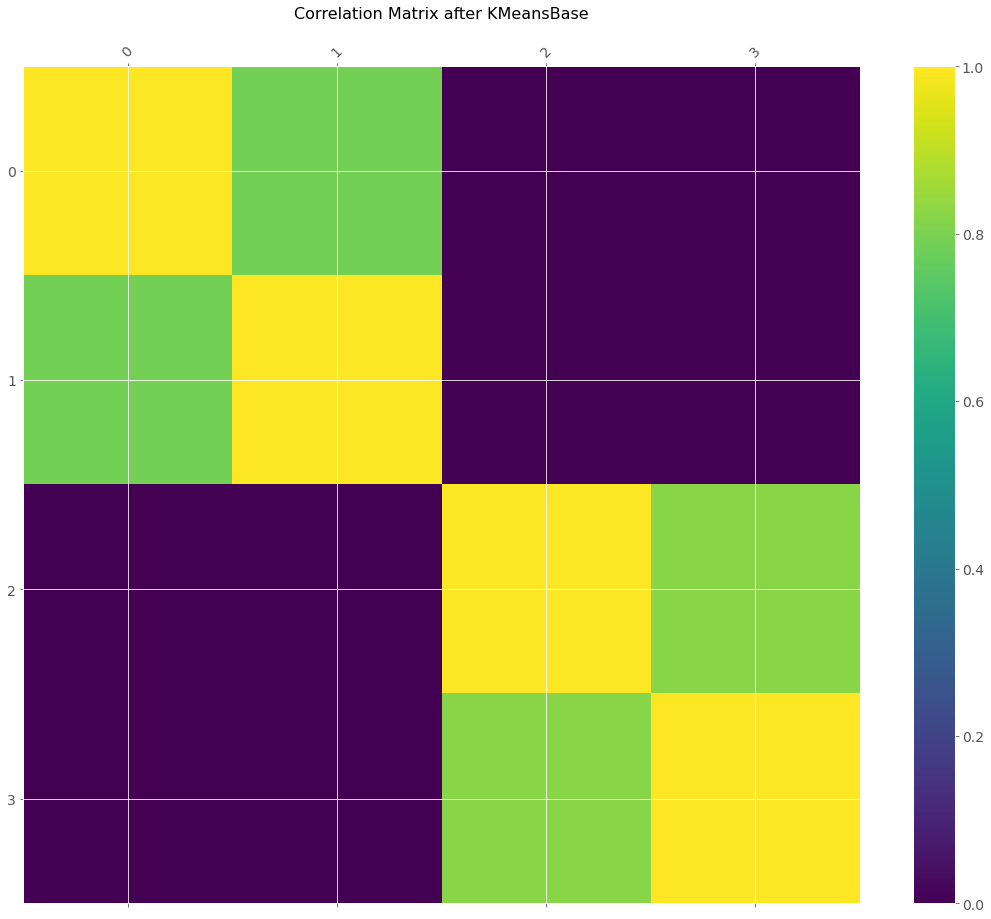

In [25]:
cf = CorrelationFactory(n_cols=4, n_blocks=2, sigma_b=0, seed=3)

cov = cf.get_rnd_block_cov(n_blocks=2, sigma=0.5)

corr = cf.cov2corr(cov)

f = plt.figure(figsize=(19, 15))
plt.matshow(corr, fignum=f.number)
plt.xticks(range(corr.shape[1]), fontsize=14, rotation=45)
plt.yticks(range(corr.shape[1]), fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix after KMeansBase', fontsize=16);


eigenvalues, eigenvectos = np.linalg.eigh(corr)

print(f"The condition number {max(eigenvalues) / min(eigenvalues)}")

The condition number increases if :
- Make one block greater
- Increase the intrablock correlation

The stability of the Markowitz's solution can be linked to a few dominant clusters within a correlation matrix.

The solution is by optimizing the dominant clusters separately.

## The Nested Clustered Optimization Algorithm
